# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [8]:
# Set units to metric for temperatures
units = "metric"

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
        
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | tolanaro
Processing Record 3 of Set 1 | guerrero negro
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | cochirleanca
Processing Record 10 of Set 1 | usogorsk
Processing Record 11 of Set 1 | durban
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | afaahiti
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | williston
Processing Record 18 of Set 1 | kiunga
Processing Record 19 of Set 1 | san antonio de pale
Processing Record 20 of Set 1 | toliara
Processing Record 21 of Set 1 | codrington
Processing Record 22 o

In [24]:
import os


# Check if the file exists
print(os.path.exists("output_data/cities.csv"))

# Load the CSV and display data
#city_data_df = pd.read_csv("output_data/cities.csv")
#print(city_data_df.shape)  # Should show (rows, columns)
#city_data_df.head()

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df.head()

True


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.17,77,66,8.67,TF,1741123286
1,tolanaro,-25.0319,46.9987,26.04,94,75,1.03,MG,1741123287
2,guerrero negro,27.9769,-114.0611,20.44,36,17,4.73,MX,1741123288
3,yellowknife,62.4560,-114.3525,-9.21,95,100,2.06,CA,1741123290
4,klyuchi,52.2667,79.1667,-7.71,96,100,3.23,RU,1741123095


In [37]:
# Display sample data
#city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,hovd,48.0056,91.6419,-19.15,78,48,1.68,MN,1738282025
1,1,thunder bay,48.4001,-89.3168,-3.01,86,20,2.57,CA,1738281800
2,2,kamuthi,9.4073,78.3734,23.79,87,44,3.65,IN,1738282027
3,3,bilibino,68.0546,166.4372,-39.42,100,89,0.23,RU,1738282028
4,4,hjo,58.3013,14.2878,1.99,96,100,1.76,SE,1738282030


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.17,77,66,8.67,TF,1741123286
1,tolanaro,-25.0319,46.9987,26.04,94,75,1.03,MG,1741123287
2,guerrero negro,27.9769,-114.0611,20.44,36,17,4.73,MX,1741123288
3,yellowknife,62.4560,-114.3525,-9.21,95,100,2.06,CA,1741123290
4,klyuchi,52.2667,79.1667,-7.71,96,100,3.23,RU,1741123095


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

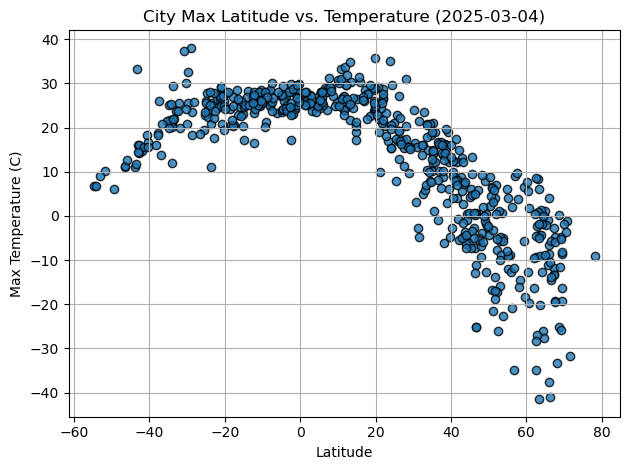

In [31]:
# import datetime to format date field
from datetime import datetime
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
current_date = datetime.now().strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

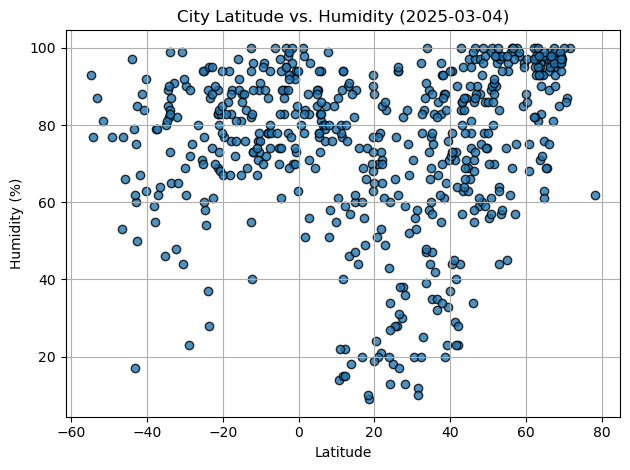

In [34]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

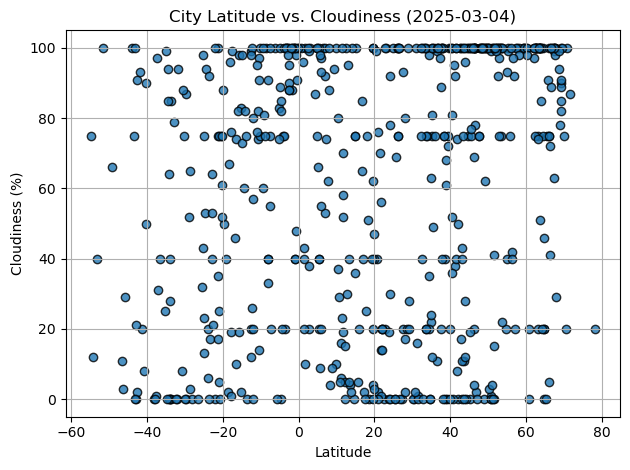

In [37]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

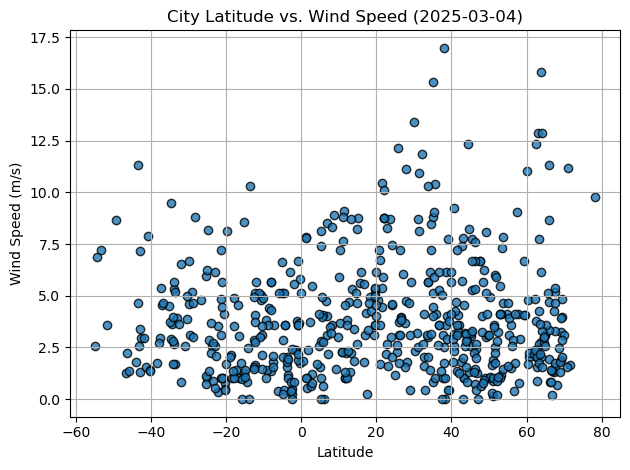

In [40]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, alpha=.8, edgecolors="k")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True) 
plt.tight_layout()
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def plot_regression_line(x_values, y_values, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    x_annot = x_values.mean() 
    y_annot = regress_values.mean()     
    plt.annotate(line_eq, (x_annot, y_annot), fontsize=15, color="red")
    
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,20.44,36,17,4.73,MX,1741123288
3,yellowknife,62.4560,-114.3525,-9.21,95,100,2.06,CA,1741123290
4,klyuchi,52.2667,79.1667,-7.71,96,100,3.23,RU,1741123095
6,gadzhiyevo,69.2551,33.3362,-4.86,97,90,3.25,RU,1741123097
7,cochirleanca,45.2167,27.0333,5.98,66,0,3.04,RO,1741123252


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.17,77,66,8.67,TF,1741123286
1,tolanaro,-25.0319,46.9987,26.04,94,75,1.03,MG,1741123287
5,blackmans bay,-43.0167,147.3167,16.07,75,0,3.39,AU,1741123293
9,durban,-29.8579,31.0292,25.51,90,87,4.59,ZA,1741123539
10,ushuaia,-54.8000,-68.3000,6.81,93,75,2.57,AR,1741123540


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.727713170054254


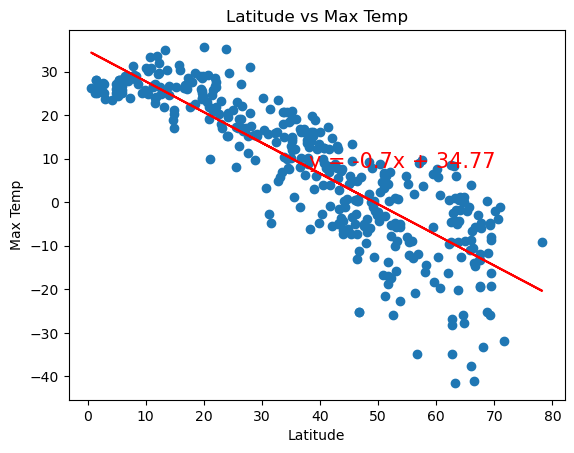

In [52]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

The r^2-value is: 0.3782794908900182


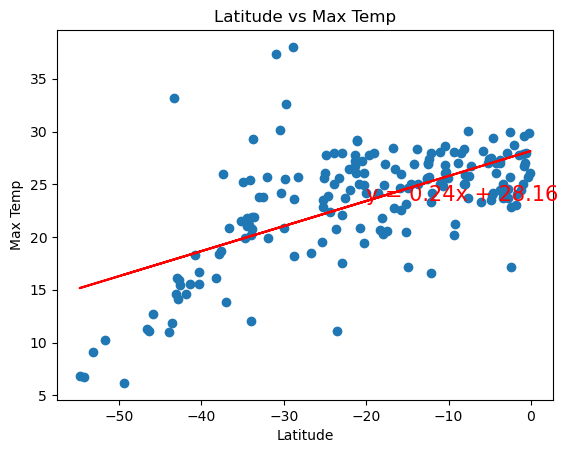

In [54]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Latitude vs Max Temp'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.1242941558137022


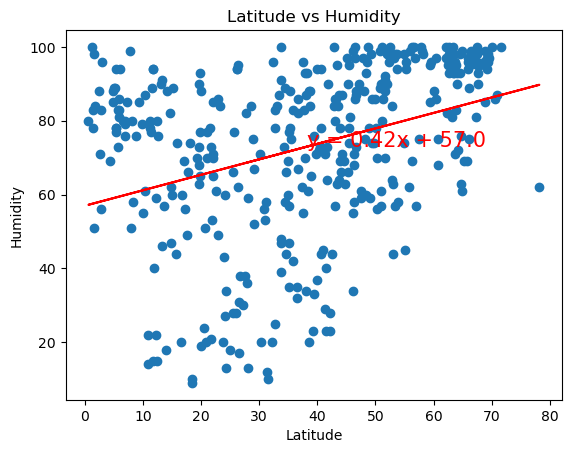

In [58]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.07305734608235472


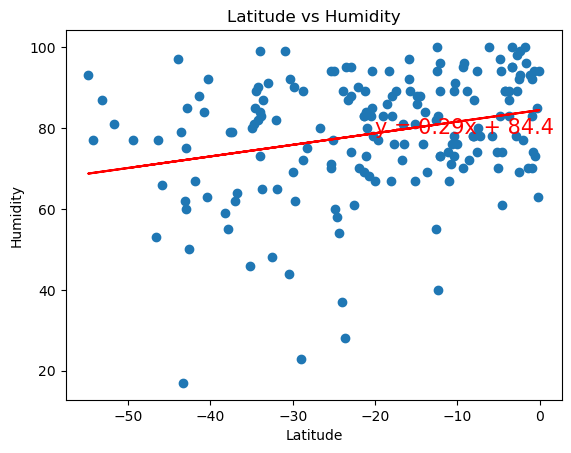

In [60]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Latitude vs Humidity'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0642237630057337


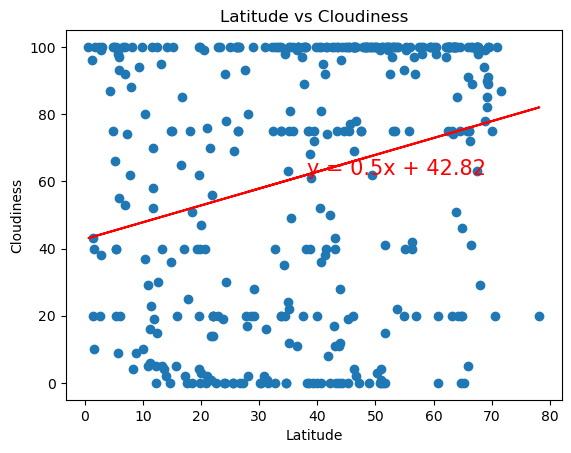

In [64]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.13011945410650022


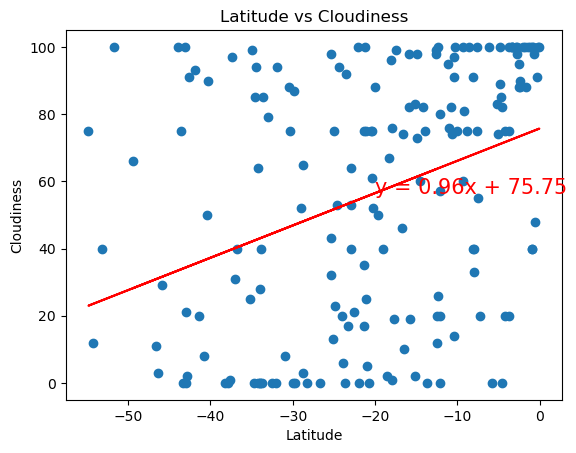

In [66]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Latitude vs Cloudiness'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.004220099121224701


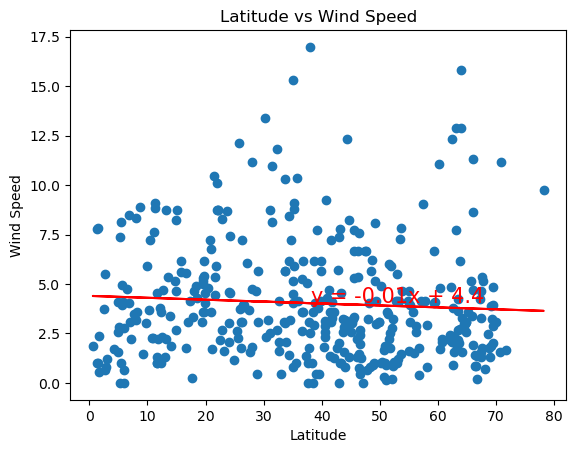

In [70]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title) 

The r^2-value is: 0.04154997084044831


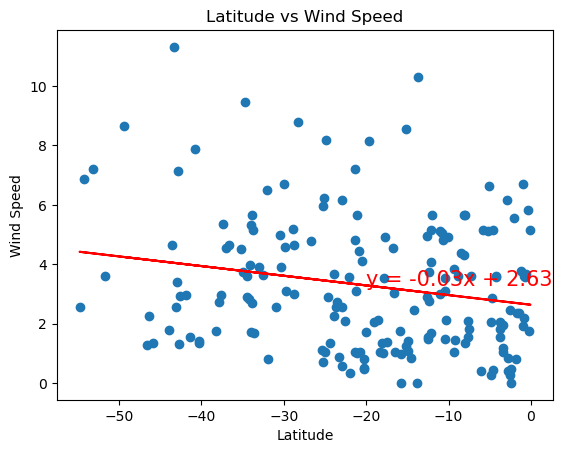

In [72]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Latitude vs Wind Speed'

plot_regression_line(x_axis, y_axis, xlabel, ylabel, title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE